In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-pollution-dataset/Air_Quality.csv


In [2]:
df=pd.read_csv("/kaggle/input/air-pollution-dataset/Air_Quality.csv")

In [3]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [4]:
df.tail()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.1,NaN
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.3,NaN
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.5,NaN
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.8,NaN
16217,325247,643,Annual vehicle miles traveled,million miles,per km2,CD,107,Upper West Side (CD7),2016,01/01/2016,50.0,NaN


In [5]:
df.shape

(16218, 12)

In [6]:
df.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [8]:
df.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(['Message'],axis=1,inplace=True)

In [11]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83


In [12]:
df.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value
count,16218.000000,16218.000000,1.621800e+04,16218.000000
mean,372730.417746,427.803613,6.097103e+05,19.975917
std,215507.613560,110.921411,7.893388e+06,21.322349
min,121644.000000,365.000000,1.000000e+00,0.000000
25%,173211.250000,365.000000,2.020000e+02,9.050000
50%,325262.500000,375.000000,3.030000e+02,15.300000
75%,605270.750000,386.000000,4.040000e+02,26.037500
max,799868.000000,661.000000,1.051061e+08,424.700000


In [13]:
df['Start_Date']=pd.to_datetime(df['Start_Date'])

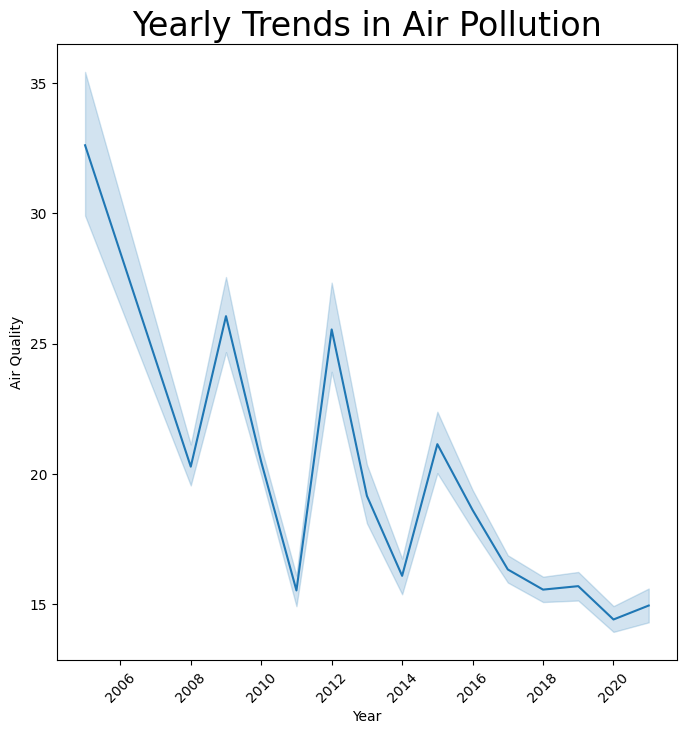

In [14]:
df['Year'] = df['Start_Date'].dt.year
plt.figure(figsize=(8,8))
sns.lineplot(x='Year',y='Data Value',data= df)
plt.title("Yearly Trends in Air Pollution",size=24)
plt.xlabel("Year")
plt.ylabel("Air Quality")
plt.xticks(rotation=45)
plt.show()


In [15]:
df['Name'].value_counts()

Name
Nitrogen dioxide (NO2)                                    5499
Fine particles (PM 2.5)                                   5499
Ozone (O3)                                                1974
Asthma emergency department visits due to PM2.5            384
Asthma hospitalizations due to Ozone                       384
Asthma emergency departments visits due to Ozone           384
Annual vehicle miles travelled (cars)                      214
Annual vehicle miles travelled (trucks)                    209
Annual vehicle miles traveled                              209
Outdoor Air Toxics - Benzene                               203
Outdoor Air Toxics - Formaldehyde                          203
Cardiac and respiratory deaths due to Ozone                192
Deaths due to PM2.5                                        192
Cardiovascular hospitalizations due to PM2.5 (age 40+)     192
Respiratory hospitalizations due to PM2.5 (age 20+)        192
Boiler Emissions- Total NOx Emissions             

In [16]:
grouped_data=df.groupby('Geo Place Name')
aggregate_data = grouped_data['Data Value'].mean()
threshold_value=20
poor_air_quality_regions=aggregate_data[aggregate_data<threshold_value]
print("Geographical areas with consistently poor air quality:")
print(poor_air_quality_regions)

Geographical areas with consistently poor air quality:
Geo Place Name
Bay Ridge and Dyker Heights (CD10)      16.561200
Bayside - Little Neck                   14.121067
Bayside Little Neck-Fresh Meadows       15.962935
Bayside and Little Neck (CD11)          15.907000
Bedford Stuyvesant (CD3)                17.439700
                                          ...    
Washington Heights and Inwood (CD12)    18.095500
West Queens                             18.641322
Williamsbridge and Baychester (CD12)    15.828200
Willowbrook                             15.063733
Woodside and Sunnyside (CD2)            18.762100
Name: Data Value, Length: 81, dtype: float64


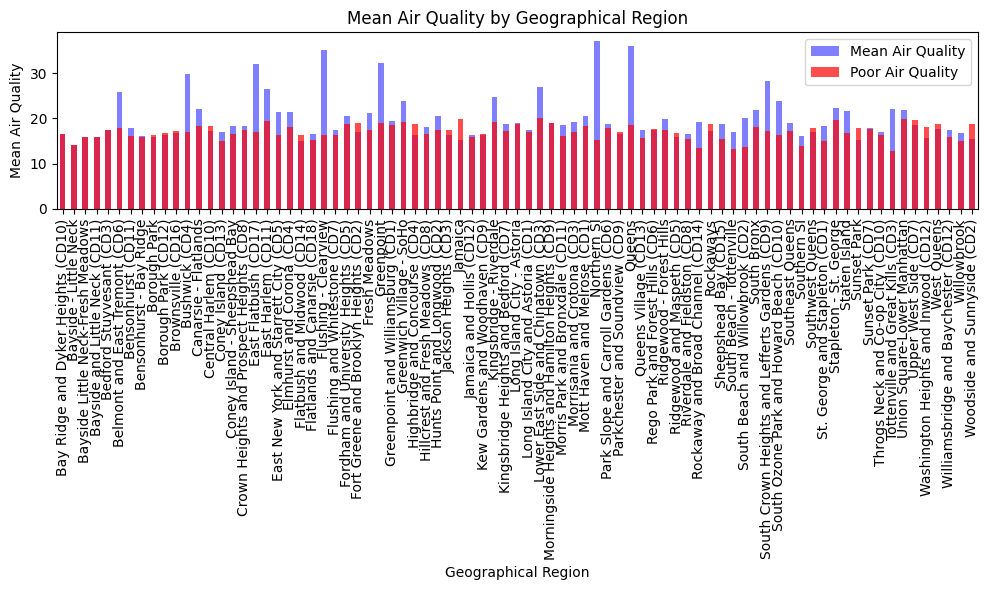

In [17]:
plt.figure(figsize=(10, 6))
aggregate_data.plot(kind='bar', color='blue', alpha=0.5, label='Mean Air Quality')

# Highlight regions with poor air quality
poor_air_quality_regions.plot(kind='bar', color='red', alpha=0.7, label='Poor Air Quality')

# Add labels and title
plt.xlabel('Geographical Region')
plt.ylabel('Mean Air Quality')
plt.title('Mean Air Quality by Geographical Region')
plt.legend()

# Show plot
plt.tight_layout()